In [1]:
import torch
import linear_rep_geometry as lrg

device = torch.device("cuda:0")

g = torch.load('matrices/g.pt').to(device)
concept_g = torch.load('matrices/concept_g.pt').to(device)
sqrt_Cov_gamma = torch.load("matrices/sqrt_Cov_gamma.pt").to(device)
W, d = g.shape

concept_names = []
with open('matrices/concept_names.txt', 'r') as f:
    for line in f.readlines():
        concept_names.append(line.strip())

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [2]:
text_batch = ["Long live the",
              "The lion is the",
              "In the hierarchy of medieval society, the highest rank was the",
              "Arthur was a legendary",
              "He was known as the warrior",
              "In a monarchy, the ruler is usually a",
              "He sat on the throne, the",
              "A sovereign ruler in a monarchy is often a",
              "His domain was vast, for he was a",
              "The lion, in many cultures, is considered the",
              "He wore a crown, signifying he was the",
              "A male sovereign who reigns over a kingdom is a",
              "Every kingdom has its ruler, typically a",
              "The prince matured and eventually became the",
              "In the deck of cards, alongside the queen is the"
              ]
lambda_batch = lrg.get_embeddings(text_batch)
l_batch = lambda_batch @ sqrt_Cov_gamma

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.
2023-10-30 14:57:51.778740: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-30 14:57:53.565526: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


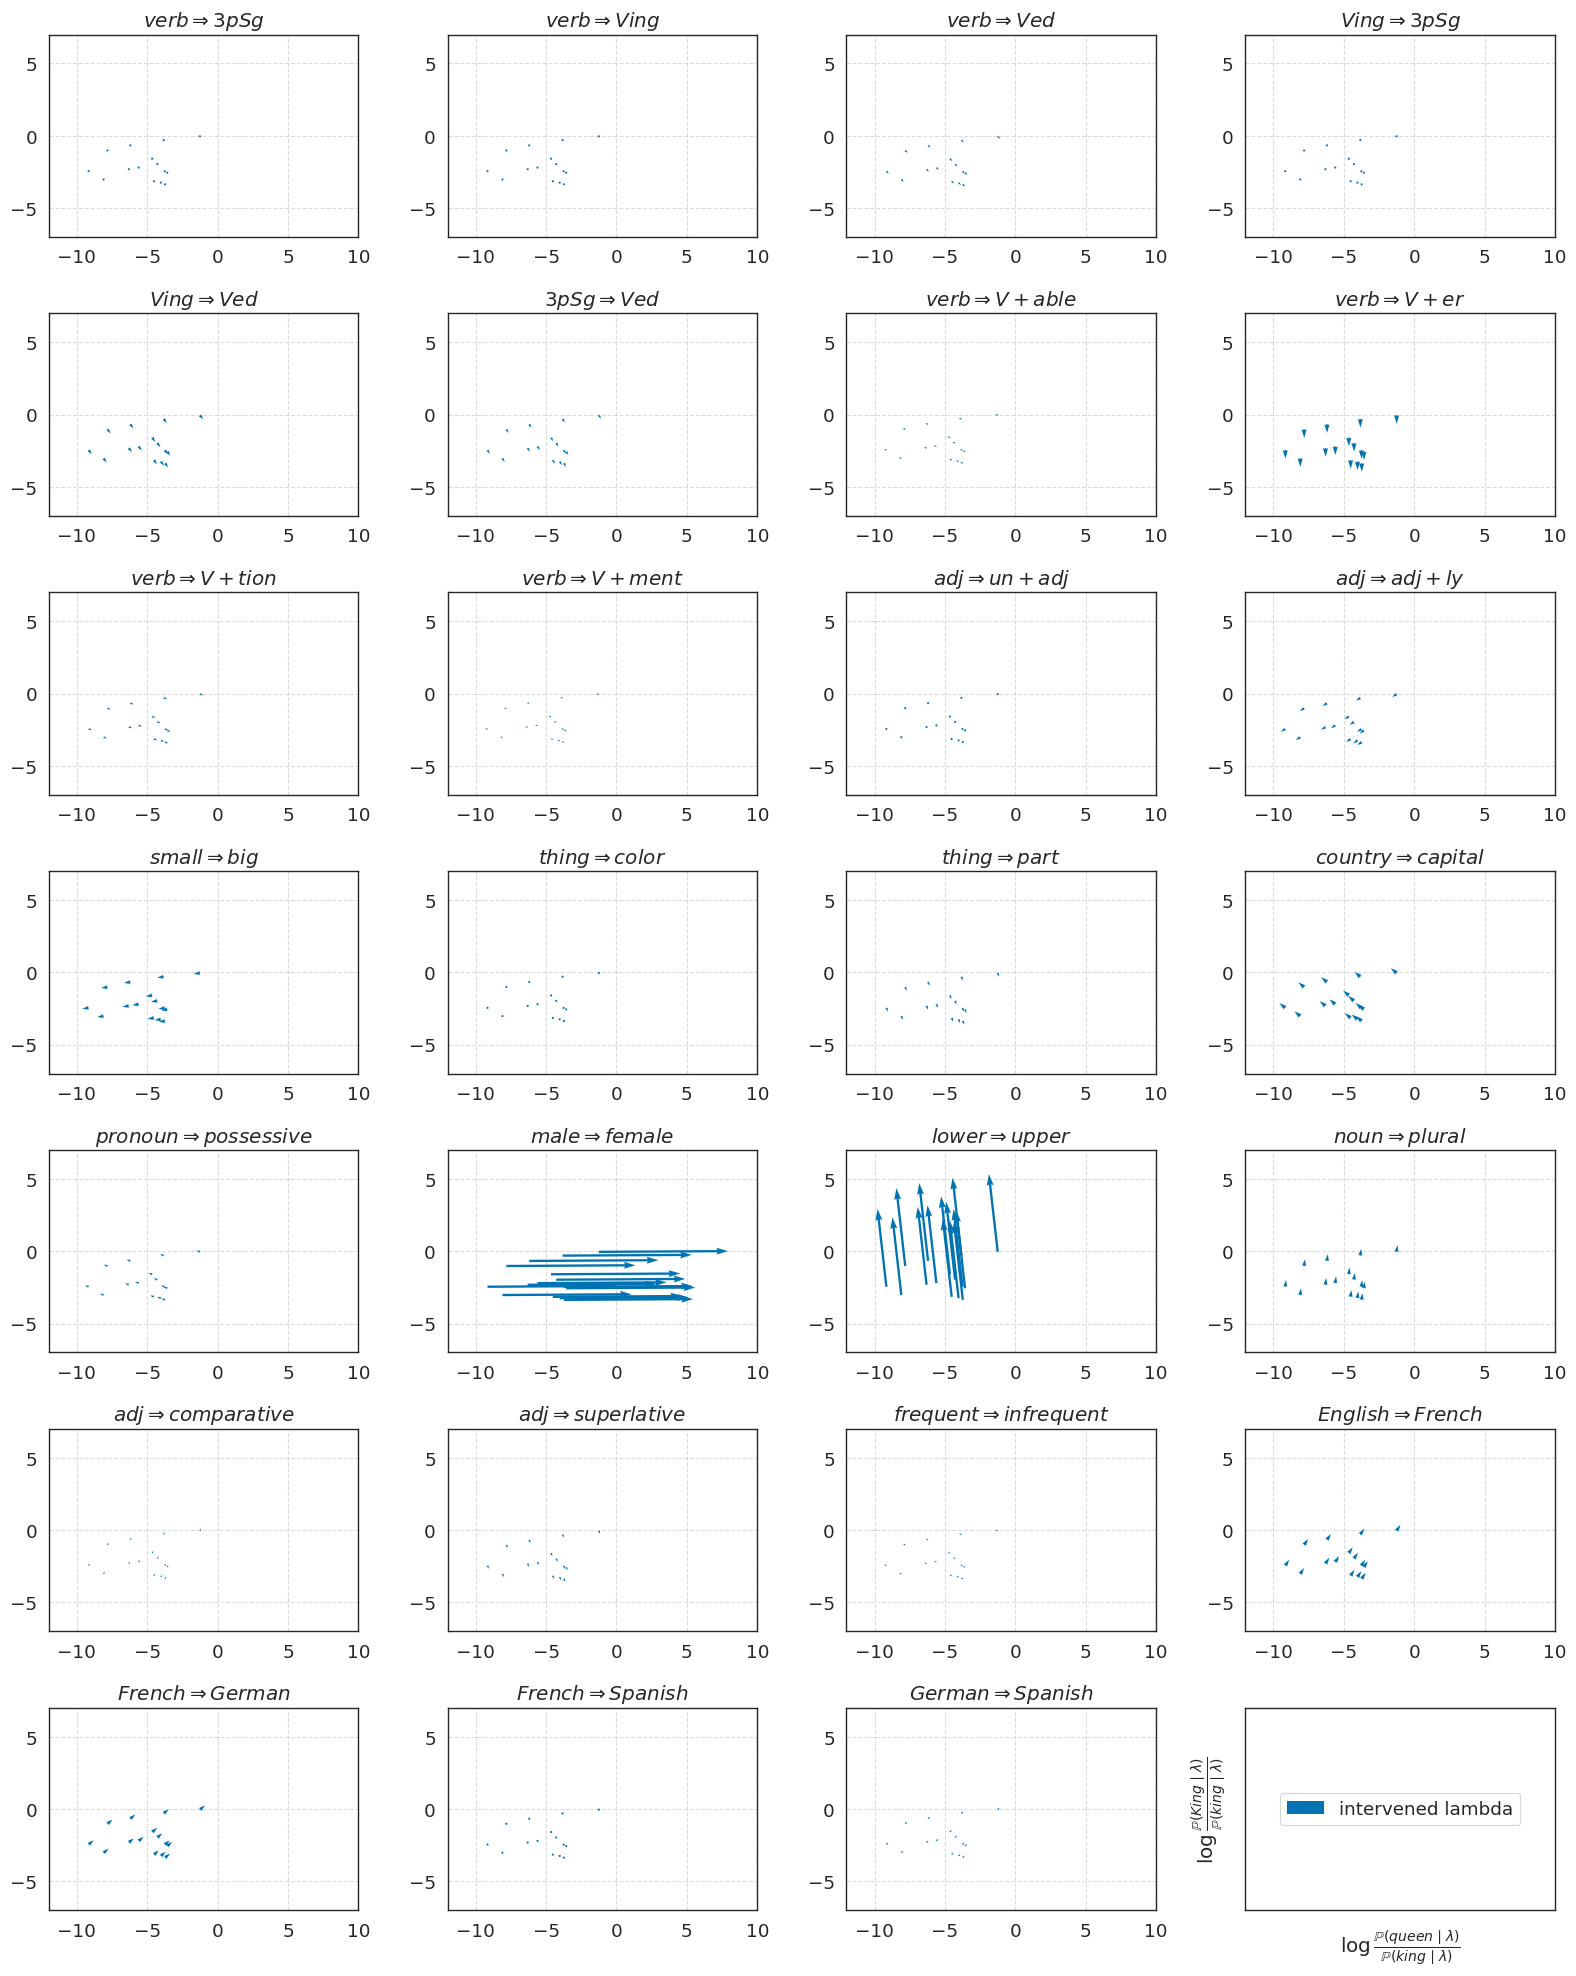

In [3]:
lrg.show_intervention(l_batch, g, concept_g, concept_names,
                        base = "king", W = "queen", Z = "King",
                        alpha = 0.4, xlim =[-12, 10], ylim =[-7, 7], fig_name = "g")

In [4]:
# check rank of the words for the intervened lambda
lrg.show_rank(text_batch, l_batch, g, concept_g, which_ind = 0, concept_number = 17)

Prompt: Long live the
  &  0.0 & 0.1 & 0.2 & 0.3 & 0.4
1 & king & Queen & queen & queen & queen
2 & King & queen & Queen & Queen & Queen
3 & Queen & king &  & lady & lady
4 & queen & King & lady & woman & woman
5 &  &  & king & women & women


In [5]:
lrg.show_rank(text_batch, l_batch, g, concept_g, which_ind = 5, concept_number = 17)

Prompt: In a monarchy, the ruler is usually a
  &  0.0 & 0.1 & 0.2 & 0.3 & 0.4
1 & king & king & her & woman & woman
2 & monarch & monarch & monarch & queen & queen
3 & member & her & member & her & female
4 & her & member & woman & monarch & her
5 & person & person & queen & member & member
